# Project: Investigating (No-show Appointments Data-set):

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

### Question 1: How many patients did not show up for their appointment?
### Question 2: Whether those patients are males or females?
### Question 3: Did they receive sms to remind them of the appointment?
### Question 4: Are there any disease related to the no-show?
### Question 5: Does age have effect on other variables?
### Question 6: What are the most common places where people don't show up for the appointments?

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties 

In [14]:
# Loading our data and read few lines
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#Investigating the data
#We get the number of patients
Total_number_patients = df.shape[0]
Total_number_patients

110527

In [16]:
#Get some statistical information about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
#See if there is any missing values in our data
df.isnull().sum().any()

False

In [18]:
#See if there is any duplicated rows in our data
df.duplicated().any()

False

### Data Cleaning

In [19]:
#Renaming the columns labels to make it easier to deal with
df.rename(columns = lambda x: x.lower().replace('-','_'), inplace = True)
df.rename(columns= {'handcap':'handicap'}, inplace = True)

In [20]:
#Remove unnecessary columns from our data
df.drop(['patientid','appointmentid'], axis=1, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
#Change values from numeric to categorical
for column in ['scholarship','hipertension','diabetes','alcoholism','handicap','sms_received']:
    df[column].replace({0:'No',1:'Yes'}, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How many patients did not show up for their appointment?)

In [22]:
no_show_df = df.query('no_show == "Yes"')
number_patients = no_show_df.shape[0]
number_patients

22319

### Research Question 2  (Whether those patients are males or females?)

In [23]:
females = no_show_df.gender.value_counts()[0]
males = no_show_df.gender.value_counts()[1]
print('No of Females = {} \nNo of Males = {}'.format(females, males))

No of Females = 14594 
No of Males = 7725


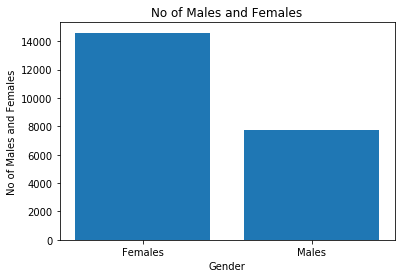

In [24]:
plt.bar(['Females', 'Males'],[females, males])
plt.title('No of Males and Females')
plt.xlabel('Gender')
plt.ylabel('No of Males and Females');

The graph shows that the number of females who didn't show up for the appointments are bigger than males.

### Research Question 3 (Did they receive sms to remind them of the appointment?)

In [25]:
receive = no_show_df.sms_received.value_counts()[1]
no_receive = no_show_df.sms_received.value_counts()[0]
print("No of patients who received sms = {}\nNo of patients who didn't receive sms = {}".format(receive, no_receive))

No of patients who received sms = 9784
No of patients who didn't receive sms = 12535


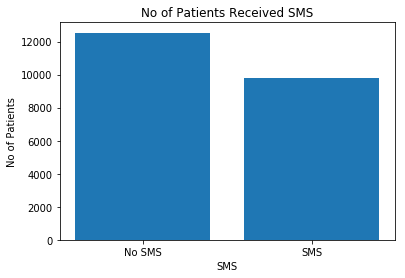

In [26]:
plt.bar(['SMS', 'No SMS'],[receive, no_receive])
plt.title('No of Patients Received SMS')
plt.xlabel('SMS')
plt.ylabel('No of Patients');

The graph shows that the number of patients who didn't receive sms are bigger than those who received.

### Research Question 4 (Are there any disease related to the no-show?)

In [27]:
yes = no_show_df.hipertension.value_counts()[1]
no = no_show_df.hipertension.value_counts()[0]
print("Have hipertension = {}\nDon't have hipertension = {}".format(yes, no))

Have hipertension = 3772
Don't have hipertension = 18547


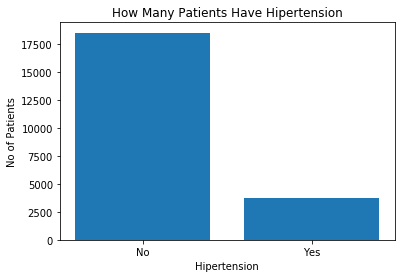

In [28]:
plt.bar(['Yes', 'No'],[yes, no])
plt.title('How Many Patients Have Hipertension')
plt.xlabel('Hipertension')
plt.ylabel('No of Patients');

The graph shows that most of the patients who didn't show up don't have hipertension.

In [29]:
yes= no_show_df.diabetes.value_counts()[1]
no= no_show_df.diabetes.value_counts()[0]
print("Have Diabetes = {}\nDon't have Diabetes = {}".format(yes, no))

Have Diabetes = 1430
Don't have Diabetes = 20889


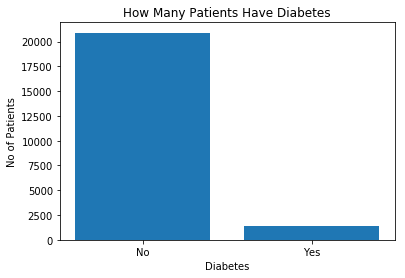

In [30]:
plt.bar(['Yes', 'No'],[yes, no])
plt.title('How Many Patients Have Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('No of Patients');

The graph shows that most of the patients who didn't show up don't have diabetes.

In [31]:
yes= no_show_df.alcoholism.value_counts()[1]
no= no_show_df.alcoholism.value_counts()[0]
print("Have alcoholism = {}\nDon't have alcoholism = {}".format(yes, no))

Have alcoholism = 677
Don't have alcoholism = 21642


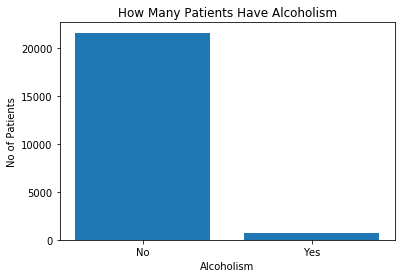

In [32]:
plt.bar(['Yes', 'No'],[yes, no])
plt.title('How Many Patients Have Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('No of Patients');

The graph shows that most of the patients who didn't show up don't have alcoholism.

In [33]:
yes= no_show_df.handicap.value_counts()[1]
no= no_show_df.handicap.value_counts()[0]
print("Have handicap = {}\nDon't have handicap = {}".format(yes, no))

Have handicap = 366
Don't have handicap = 21912


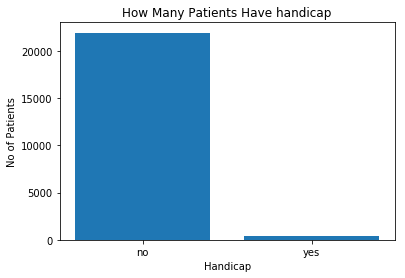

In [34]:
plt.bar(['yes', 'no'],[yes, no])
plt.title('How Many Patients Have handicap')
plt.xlabel('Handicap')
plt.ylabel('No of Patients');

The graph shows that most of the patients who didn't show up don't have handicap.

### Research Question 5 (Does age have effect on other variables?)

In [35]:
#We get some information about the age of the patients who didn't show up
no_show_df.age.describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

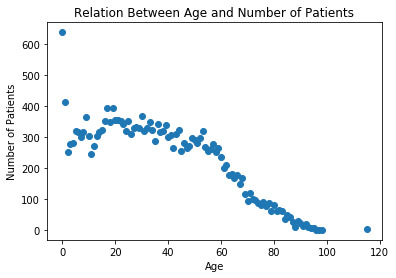

In [53]:
#Relationship between no of patients and their age
age= no_show_df.age.value_counts().keys()
number_patients = no_show_df.age.value_counts().values
plt.scatter(age, number_patients)
plt.title('Relation Between Age and Number of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients');

The graph shows that there is negative correlation between age and number of patients who didn't show up.

In [96]:
#Relation between age and hipertension
yes= no_show_df.query('hipertension == "Yes"')['age'].mean()

In [97]:
no= no_show_df.query('hipertension == "No"')['age'].mean()

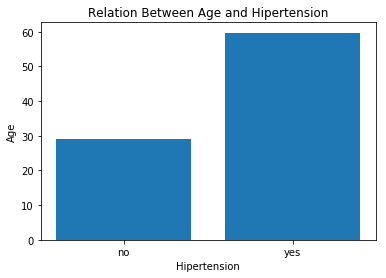

In [98]:
plt.bar(['yes', 'no'],[yes, no])
plt.title('Relation Between Age and Hipertension')
plt.xlabel('Hipertension')
plt.ylabel('Age');

The graph shows that there is positive correlation between age and hipertension.

In [54]:
#Relation between age and diabetes
yes= no_show_df.query('diabetes == "Yes"')['age'].mean()

In [55]:
no= no_show_df.query('diabetes == "No"')['age'].mean()

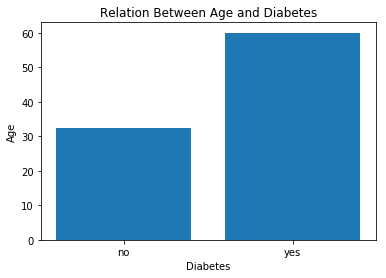

In [56]:
plt.bar(['yes', 'no'],[yes, no])
plt.title('Relation Between Age and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Age');

The graph shows that there is positive correlation between age and diabetes.

In [57]:
#Relation between age and alcoholism
yes= no_show_df.query('alcoholism == "Yes"')['age'].mean()

In [58]:
no= no_show_df.query('alcoholism == "No"')['age'].mean()

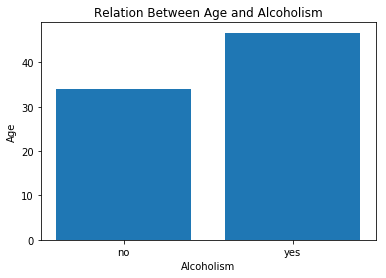

In [59]:
plt.bar(['yes', 'no'],[yes, no])
plt.title('Relation Between Age and Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Age');

The graph shows that there is positive correlation between age and alcoholism.

In [60]:
#Relation between age and handicap
yes= no_show_df.query('handicap == "Yes"')['age'].mean()

In [61]:
no= no_show_df.query('handicap == "No"')['age'].mean()

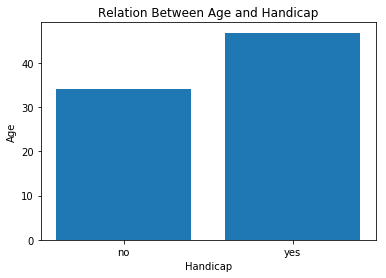

In [62]:
plt.bar(['yes', 'no'],[yes, no])
plt.title('Relation Between Age and Handicap')
plt.xlabel('Handicap')
plt.ylabel('Age');

The graph shows that there is positive correlation between age and handicap.

### Research Question 6 (What are the most common places where people don't show up for the appointments?)

In [63]:
most_common = no_show_df.neighbourhood.value_counts()[0:10]
most_common

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: neighbourhood, dtype: int64

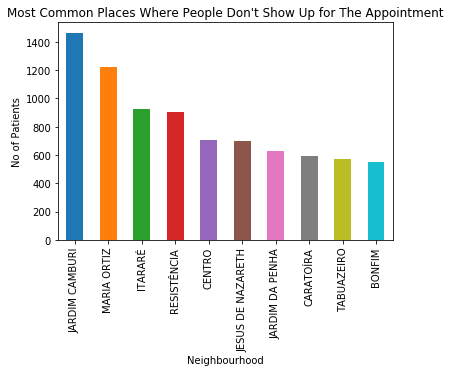

In [64]:
most_common.plot(kind='bar')
plt.title("Most Common Places Where People Don't Show Up for The Appointment");
plt.xlabel('Neighbourhood')
plt.ylabel('No of Patients');

<a id='conclusions'></a>
## Conclusions

### In our analysis, we posed 5 questions:

### Q1) How many patients did not show up for their appointment?
We found that 20% of the patients didn't show up for the appointments.

### Q2) Whether those patients are males or females?
We found that 60% of the patients who didn't show up are females.
### Q3) Did they receive sms to remind them of the appointment?
We found that almost 60% of the patients who didn't show up didn't get an sms to remind them of the appointment.
### Q4) Are there any disease related to the no-show?
We found that a very little percentage of the patients who didn't show up have any disease who might lead them to not show up.
### Q5) Does age have effect on other variables?
We found that there is a positive correlation between age and some disease.
### Q6) What are the most common places where people don't show up for the appointments?
We found that the top 10 neighbourhoods where people didn't show up are JARDIM CAMBURI, MARIA ORTIZ, ITARARÉ, RESISTÊNCIA, CENTRO, JESUS DE NAZARETH, JARDIM DA PENHA, CARATOÍRA, TABUAZEIRO and BONFIM.


## Limitations:
Most variables are categorical, we don't have values for hipertension or diabetes. We only know if the patient have them or not. This may mislead our analysis.

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0